<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

The theory part of this tutorial has been written following Chapter 9 of Christopher M. Bishop's "Pattern Recognition and Machine Learning" book which is freely available <a href="http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf">here</a>.

Libraries needed: <i>numpy</i>, <i>pandas</i>, <i>matplotlib</i>

<h1>1. Mixtures of Gaussians </h1>

A Gaussian mixture distribution is a linear combination of Gaussians, i.e.

\begin{align}\tag{1}
p(\mathbf{x})= \sum_{k=1}^K \pi_k\mathcal{N}\left(\mathbf{x}\left|\mu_k,\Sigma_k\right.\right).
\end{align}

Introduce now a $K$-dimensional binary random variable $\mathbf{z}$ for which only one of its elements is $1$ and all the others are 0. The elements of $\mathbf{z}$ thus satisfy $\sum_k z_k = 1$ and $z_k\in\left\{0,1\right\}$. To get the marginal distribution of $\mathbf{z}$, we first define



\begin{align}\tag{2}
p(z_k = 1) = \pi_k, 
\end{align}

where $0 \leq \pi_k \leq 1$ and $\sum_k\pi_k = 1$. Then, the marginal distribution of $\mathbf{z}$ is given by

\begin{align}\tag{3}
p(\mathbf{z}) = \prod_k \pi_k^{z_k}.
\end{align}

In fact, only one of the elements of $\mathbf{z}$ is non-zero, which means that if $z_i = 1$ and $z_k=0$ for $k\neq i$, then

\begin{align}\tag{4}
p(\mathbf{z}) = \prod_k \pi_k^{z_k} = \pi_1^{z_1}\pi_2^{z_2}\cdot\cdot\cdot\pi_i^{z_i}\cdot\cdot\cdot = \pi_1^{0}\pi_2^{0}\cdot\cdot\cdot\pi_i^{1}\cdot\cdot\cdot=\pi_i = p(z_i = 1).
\end{align}

We can think that the random variable $\mathbf{z}$ tells us from which Gaussian of the linear combination in Eq.(1) a certain variable $\mathbf{x}$ has been drawn. We can write the conditional probability distribution of $\mathbf{x}$ given a particular value of $\mathbf{z}$ as

\begin{align}\tag{5}
p(\mathbf{x}\left|z_k = 1\right.) = \mathcal{N}\left(\mathbf{x}\left|\mu_k,\Sigma_k\right.\right).
\end{align}

Following what we did to obtain Eq.(3), we can rewrite Eq.(5) as

\begin{align}\tag{6}
p(\mathbf{x}\left|\mathbf{z}\right.)= \prod_{k=1}^K\left[\mathcal{N}\left(\mathbf{x}\left|\mu_k,\Sigma_k\right.\right)\right]^{z_k}.
\end{align}


The marginal distribution of Eq.(1) can now be expressed as a function of our newly introduced latent variable $\mathbf{z}$. One has

\begin{align}\tag{7}
p(\mathbf{x}) = \sum_{\mathbf{z}}p(\mathbf{x},\mathbf{z}) = \sum_{\mathbf{z}}p(\mathbf{x}\left|\mathbf{z}\right.)p(\mathbf{z}),
\end{align}

and using Eq.(3) and Eq.(6) we obtain

\begin{align}\tag{8}
p(\mathbf{x}) = \sum_{k=1}^K \pi_k\mathcal{N}\left(\mathbf{x}\left|\mu_k,\Sigma_k\right.\right),
\end{align}

which is exactly like Eq.(1).

We can also calculate the conditional probability of $\mathbf{z}$ given $\mathbf{x}$ using Bayes theorem:

\begin{align}\tag{9}
p(\left.z_k = 1 \right| \mathbf{x}) = \frac{p(\mathbf{x}\left|z_k = 1\right.)p(z_k = 1)}{p(\mathbf{x})},
\end{align}

and using Eqs.(2), (5) and (8) we get

\begin{align}\tag{10}
\gamma(z_k) \equiv p(\left.z_k = 1 \right| \mathbf{x}) = \frac{\pi_k\mathcal{N}\left(\mathbf{x}\left|\mu_k,\Sigma_k\right.\right)}{\sum_{j=1}^K \pi_j\mathcal{N}\left(\mathbf{x}\left|\mu_j,\Sigma_j\right.\right)}.
\end{align}

We can interprete $p(\mathbf{z})$ as the prior probability of $\mathbf{z}$, and $\gamma(z_k) \equiv p(\mathbf{z}|\mathbf{x})$ as the posterior probability once $\mathbf{x}$ has been observed.

<h1>2. Expectation-Maximization algorithm </h1>

Suppose we draw $M$ samples from the Gaussian mixture of Eq.(1). Each sample will be a column vector in $\mathbb{R}^N$. The samples are stored in a design matrix $X\in\mathbb{R}^{M\times N}$. Likewise, for each sample $\mathbf{x}_m$ we will have a latent variable $\mathbf{z}_m\in\mathbb{R}^N$. We collect the latent variable vectors in a matrix $Z\in\mathbb{N}^{M\times K}$. Then, the total distribution for our $M$ samples will be

\begin{align}\tag{11}
p(X)=\prod_{m=1}^Mp(\mathbf{x}_m) = \prod_{m=1}^M \sum_{k=1}^K \pi_k\mathcal{N}\left(\mathbf{x}\left|\mu_k,\Sigma_k\right.\right).
\end{align}

We want now to maximize this distribution wich depends on the three parameters $\Sigma_k, \mu_k$ and $\pi_k$. For convenience we will consider the logarithm of the distribution,  which is given by

\begin{align}\tag{12}
\log p(X) = \sum_{m=1}^M\log\left[\sum_{k=1}^K \pi_k\mathcal{N}\left(\mathbf{x}_m\left|\mu_k,\Sigma_k\right.\right)\right].
\end{align}

As in any minimization/maximization problem, we take the derivatives of Eq.(12) and we set them to zero. 

<h3> Derivatives of the normal distribution </h3>

Let's recall the formula for the normal distribution:

\begin{align}\tag{13}
\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) = \frac{1}{(2\pi)^{D/2}}\frac{1}{\sqrt{\det\Sigma}}\exp\left\{-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right\},
\end{align}

and in components

\begin{align}\tag{14}
\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) = \frac{1}{(2\pi)^{D/2}}\frac{1}{\sqrt{\det\Sigma}}\exp\left\{-\frac{1}{2}\sum_{ij}(x-\mu)_{i}\Sigma^{-1}_{ij}(x-\mu)_{j}\right\}.
\end{align}


The multivariate normal distribution depends on two parameters, the vector mean $\mu\in\mathbb{R}^{N}$ and the covariance matrix $\Sigma\in\mathbb{R}^{N\times N}$. Here we derive the expression of the derivatives with respect of these two variables for the normal distribution in Eq.(13):

\begin{align}\tag{15}
\frac{\partial\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)}{\partial \mu_k} =& -\frac{1}{2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\sum_{ij}\left[\delta_{ik}\Sigma^{-1}_{ij}(x-\mu)_j + (x-\mu)_i\Sigma^{-1}_{ij}\delta_{jk}\right] \\
=& -\frac{1}{2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\sum_{i}\left(\Sigma^{-1}_{ki} + \Sigma^{-1}_{ik}\right)(x-\mu)_i
\end{align}

and in matrix form

\begin{align}\tag{16}
\nabla_\mu \mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) = -\frac{1}{2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) \left[\Sigma^{-1} + \left(\Sigma^{-1}\right)^T\right](\mathbf{x}-\mu)
\end{align}


To calculate the derivative with respect to the covariance matrix, we need to be able to calculate the derivative of the determinant which appears in the denominator of the normalization factor of Eq.(13). To do so we can use a special case of <a href="https://en.wikipedia.org/wiki/Jacobi%27s_formula">Jacobi's formula</a>

\begin{align}\tag{17}
\frac{\partial \det\left(\Sigma\right)}{\partial\Sigma_{ij}} = \textrm{adj}^T(\Sigma)_{ij} = \det(\Sigma)\left(\Sigma^{-1}\right)^T_{ij}
\end{align}

where the <a href="https://en.wikipedia.org/wiki/Adjugate_matrix">adjugate matrix</a> $\textrm{adj}(\Sigma)$ is defined as 

\begin{align}\tag{18}
\textrm{adj}(\Sigma) = \det(\Sigma)\Sigma^{-1}.
\end{align}

Then we have

\begin{align}\tag{19}
\frac{\partial \det\left(\Sigma\right)^{-1/2}}{\partial\Sigma_{ij}} = -\frac{1}{2}\det\left(\Sigma\right)^{-3/2}\frac{\partial \det\left(\Sigma\right)}{\partial\Sigma_{ij}} = -\frac{1}{2}\det\left(\Sigma\right)^{-1/2}\left(\Sigma^{-1}\right)^T_{ij}
\end{align}


We can now compute the derivative with respect to the covariance matrix:

\begin{align}\tag{20}
\frac{\partial\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)}{\partial \Sigma_{pq}}=& \det\left(\Sigma\right)^{1/2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\frac{\partial \det\left(\Sigma\right)^{-1/2}}{\partial\Sigma_{pq}} - \frac{1}{2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\sum_{ij}(x-\mu)_i\frac{\partial\Sigma^{-1}_{ij}}{\partial\Sigma_{pq}}(x-\mu)_j.
\end{align} 

We use now Eq.(20) to simplify the first term and we collect the normal distribution:

\begin{align}\tag{21}
\frac{\partial\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)}{\partial \Sigma_{pq}}=& \mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\left[-\frac{1}{2}\left(\Sigma^{-1}\right)^T_{pq} + \frac{1}{2}\sum_{ij}(x-\mu)_i\Sigma_{ij}^{-1}\Sigma_{ij}^{-1}(x-\mu_j)\delta_{pi}\delta_{qj}\right].
\end{align}

By collecting more terms and simplifying the sum with the deltas we finally obtain:

\begin{align}\tag{22}
\frac{\partial\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)}{\partial \Sigma_{pq}}=& \frac{1}{2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\left[-\left(\Sigma^{-1}\right)^T_{pq} + \left(\Sigma^{-1}\right)^T_{qp}(x-\mu)_p(x-\mu_q)\left(\Sigma^{-1}\right)^T_{qp}\right],
\end{align}

where we used $\Sigma_{pq}^{-1} = \left(\Sigma^{-1}\right)^T_{qp}$. We can rewrite Eq.(21) in the compact matrix form


\begin{align}\tag{23}
\nabla_{\Sigma}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) = \frac{1}{2}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\left[\left(\Sigma^{-1}\right)^T\left(x-\mu\right)\left(x-\mu\right)^T\left(\Sigma^{-1}\right)^T - \left(\Sigma^{-1}\right)^T\right]
\end{align}


Equations (16) and (23) are general expression. If the covariance matrix $\Sigma$ is symmetric, i.e. $\Sigma = \Sigma^T$ and $\left(\Sigma^{-1}\right) = \left(\Sigma^{-1}\right)^T$, they simplify to


\begin{align}\tag{24}
\nabla_\mu \mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) = -\Sigma^{-1}(\mathbf{x}-\mu)\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right),
\end{align}

\begin{align}\tag{25}
\nabla_\Sigma \mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right) = \frac{1}{2}\Sigma^{-1}\mathcal{N}\left(\mathbf{x}\left|\mu,\Sigma\right.\right)\left[\left(x-\mu\right)\left(x-\mu\right)^T\Sigma^{-1} - \mathbb{I}\right],
\end{align}

where $\mathbb{I}$ is the identity matrix.


<h3> Derivative with respect to $\mu_k$ of the log-likelihood</h3>


We first take the derivative with respect to $\mu_i$ of the log-likelihood of Eq.(12):

\begin{align}\tag{26}
0 = \frac{\partial \log p(X)}{\partial \mu_i} = \sum_{m=1}^M \frac{1}{\sum_{j=1}^K \pi_j\mathcal{N}\left(\mathbf{x}_m\left|\mu_j,\Sigma_j\right.\right)}\sum_{k=1}^K\pi_k\frac{\partial\mathcal{N}\left(\mathbf{x}_m\left|\mu_k,\Sigma_k\right.\right)}{\partial \mu_i},
\end{align}

and using the result in Eq.(24) we get

\begin{align}\tag{27}
0 = \frac{\partial \log p(X)}{\partial \mu_i} = -\sum_{m=1}^M \frac{\pi_i\mathcal{N}\left(\mathbf{x}_m\left|\mu_i,\Sigma_i\right.\right)}{\sum_{j=1}^K \pi_j\mathcal{N}\left(\mathbf{x}_m\left|\mu_j,\Sigma_j\right.\right)}\Sigma_i^{-1}(\mathbf{x}_m-\mu_i) = -\sum_{m=1}^M \gamma(z_{im})\Sigma_i^{-1}(\mathbf{x}_m-\mu_i),
\end{align}

where in the last equality we used the definition of the posterior probability of $\mathbf{z}$ from Eq.(10). Multiplying Eq.(27) by $\Sigma_i$ and solving for $\mu_i$ we get

\begin{align}\tag{28}
\mu_k = \frac{\sum_{m=1}^M\gamma(z_{km})\mathbf{x}_m}{\sum_{m=1}^M\gamma(z_{km})}.
\end{align}

<h3> Derivative with respect to $\Sigma_k$ of the log-likelihood </h3>

Deriving the log-likelihood with respect to the covariance matrix $\Sigma_i$ we get:
    
\begin{align}\tag{29}
0=\frac{\partial\log p(X)}{\partial\Sigma_i} = \sum_{m=1}^M \frac{1}{\sum_{j=1}^K \pi_j\mathcal{N}\left(\mathbf{x}_m\left|\mu_j,\Sigma_j\right.\right)}\sum_{k=1}^K\pi_k \frac{\partial \mathcal{N}\left(\mathbf{x}_m\left|\mu_k,\Sigma_k\right.\right)}{\partial\Sigma_i},
\end{align}

and making use of Eq.(25) we obtain

\begin{align}\tag{30}
0=\frac{\partial\log p(X)}{\partial\Sigma_i} =\frac{1}{2}\sum_{m=1}^M \frac{\pi_i\mathcal{N}\left(\mathbf{x}_m\left|\mu_i,\Sigma_i\right.\right)}{\sum_{j=1}^K \pi_j\mathcal{N}\left(\mathbf{x}_m\left|\mu_j,\Sigma_j\right.\right)}\Sigma_i^{-1}\left[(\mathbf{x}_m-\mu_i)(\mathbf{x}_m-\mu_i)^T\Sigma^{-1}_i - \mathbb{I}\right],
\end{align}

or in a more compact form

\begin{align}\tag{31}
0 =\frac{1}{2}\sum_{m=1}^M \gamma\left(z_{mi}\right)\Sigma_i^{-1}\left[(\mathbf{x}_m-\mu_i)(\mathbf{x}_m-\mu_i)^T\Sigma^{-1}_i - \mathbb{I}\right].
\end{align}

We can now multiply on the left by $2\Sigma_i$ and on the right by $\Sigma_i$ we find

\begin{align}\tag{32}
0 =\sum_{m=1}^M \gamma\left(z_{mi}\right)\left[(\mathbf{x}_m-\mu_i)(\mathbf{x}_m-\mu_i)^T - \Sigma_i\right],
\end{align}

and solving for $\Sigma_i$ one has

\begin{align}\tag{33}
\Sigma_i = \frac{\sum_{m=1}^M\gamma\left(z_{mi}\right)(\mathbf{x}_m-\mu_i)(\mathbf{x}_m-\mu_i)^T}{\sum_{m=1}^M\gamma\left(z_{mi}\right)}.
\end{align}

<h3> Derivative with respect to $\pi_k$ of the log-likelihood </h3>

As last step we maximize the log-likelihood with respect to $\pi_i$. However, we know that the $\pi_i$ coefficients are subject to the constraint $\sum_i\pi_i = 1$. We take into account this constraint in the maximization by introducing a <a href="https://en.wikipedia.org/wiki/Lagrange_multiplier">lagrangian multiplier</a> $\lambda$ and maximize the following function

\begin{align}\tag{34}
0=\frac{\partial}{\partial\pi_i}\left[\log p(X) + \lambda\left(\sum_k\pi_k - 1\right)\right] = \sum_{m=1}^M \frac{\mathcal{N}\left(\mathbf{x}_m\left|\mu_i,\Sigma_i\right.\right)}{\sum_{j=1}^K \pi_j\mathcal{N}\left(\mathbf{x}_m\left|\mu_j,\Sigma_j\right.\right)} + \lambda.
\end{align}

Multiplying both sides by $\pi_i$ one gets

\begin{align}\tag{35}
0 = \sum_{m=1}^M\gamma\left(z_{mi}\right) + \lambda\pi_i.
\end{align}

Summung Eq.(35) over $i$ and using the constraints $\sum_i\gamma(z_{mi}) = 1$ and $\sum_i\pi_i=1$ we find $\lambda=-M$. Substituting in Eq.(35) and solving for $\pi_i$ we finally obtain

\begin{align}\tag{36}
\pi_i = \frac{1}{M}\sum_{m=1}^M\gamma\left(z_{mi}\right).
\end{align}

<h3> E(xpectation) and M(aximization) steps </h3>

The final formulas for the means $\mu_k$, the mixing coefficients $\pi_k$ and the covariance matrice $\Sigma_k$ are not closed form solutions for our problem. These variables clearly depend upon each other. This suggests that one can use an iterative algorithm to estimate the best values for these parameters. The strategy is to choose an initial set of $\mu_k, \pi_k$ and $\Sigma_k$, and then alternate between an E(xpectation) step and a M(aximization) step:

<ul>
<li>E-step: use the current values of the parameters to update the posterior distributions $\gamma(z_{m})$.</li>
<li>M-step: reestimate $\mu_k, \pi_k$ and $\Sigma_k$ using Eqs.(28), (33) and (36). </li>
</ul>

We then iterate the above procedure until convergence is reached.

<h1>3. Python implementation of EM algorithm </h1>

<h3> Importing and visualizing the dataset </h3>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
# Import dataset and drop firs column (index column)
df = pd.read_csv("../DATASETS/faithful.csv")
df.drop(df.columns[[0]],axis=1,inplace=True)
print df.head(3)

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74


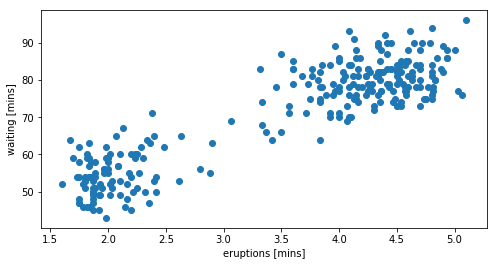

In [3]:
# Visualize data
fig = figure(figsize=(8,4))
sub = fig.add_subplot(111)

sub.scatter(df.eruptions,df.waiting)
sub.set_xlabel('eruptions [mins]')
sub.set_ylabel('waiting [mins]')

plt.show()

<h3> Normalizing the data and initializing EM parameters</h3>

We define two functions to normalize the data and randomly initialize the problem parameters.

In [4]:
# Function to normalize data in a dataframe in the range [0,1]
def _normalize_data(df):
    # Number of columns
    header = df.columns.values
    # Normalize column by column
    for col in header:
        cmax = np.max(df[col])
        cmin = np.min(df[col])
        df[col] = df[col].apply(lambda r: float(r - cmin)/float(cmax - cmin))
    return df

# Function which initializes the parameters
# Inputs are the dimension of the data points N
# and the number of clusters K
def _initialize(N,K):
    np.random.seed(26)
    # Initialize mean vectors (one for each cluster) (KxN)
    mu = np.random.rand(K,N)
    #mu[0,0] = 0.0
    #mu[0,1] = 0.0
    #mu[1,0] = 1.0
    #mu[1,1] = 1.0
    # Initialize mixing coefficients (one for each cluster) (1xK)
    # NB: they must be normalized
    pi = np.random.rand(K)
    pi = pi / np.sum(pi)
    #pi = np.zeros(K)
    #for k in range(K):
    #    pi[k] = 1.0 / float(K)
    # Initialize covariance matrices (one for each cluster) (NxN)
    E = range(K)
    for k in range(K):
        E[k] = np.identity(N)
    
    return mu,E,pi


We now call these functions and normalize the data. We then select the number of clusters $K$ (in this case 2, since it is clear from the visualization of the dataset that we have 2 distinct clusters) and we setup the data (design) matrix $X$. We then initialize $\pi_k,\mu_k$ and $\Sigma_k$.

In [5]:
# Normalize data
df = _normalize_data(df)
# Set data matrix
X = np.matrix(df)
# Set number of clusters
K = 2
# Find dimension of data
M,N = X.shape
# Initialize matrices for clustering EM algorithm
mu,E,pi = _initialize(N,K)

<h3> Calculating the posterior for the latent variable </h3>

Here we define a function to get the value of the multivariate normal distribution $\mathcal{N}(\mathbf{x}_m|\mu_k,\Sigma_k)$ given a data point $\mathbf{x}_m$. We also code a function to obtain the posterior $\gamma(z_{mk})$.

In [6]:
def _normal(x,mu,E):
    norm = 1.0 / ((2.0*np.pi)**len(x)*np.sqrt(np.linalg.det(E)))
    delta = (x - mu) # (1xN)
    exponent = np.dot(np.dot(delta,np.linalg.pinv(E)),np.transpose(delta))
    return norm * np.exp(-0.5 * exponent)

# Calculation of the posterior of the latent variable z
# This function basically performs the E step in the EM algorithm
def _getGamma(X,mu,E,pi):
    M,N = X.shape
    K = len(E)
    gamma = np.zeros((M,K),dtype=float)

    for m in range(M):
        for k in range(K):
            gamma[m,k] = pi[k] * _normal(X[m,:],mu[k],E[k])
        # Normalize posterior
        gamma[m,:] = gamma[m,:] / np.sum(gamma[m,:],axis=0)
    return gamma
   

Once we calculated the posterior of the latent variable, we need to reevaluate the parameters of the Gaussian Mixture. We do these in a function where we do the so-called M-step.

In [7]:
# Maximization step: update parameters
def _Mstep(X,gamma):
    M,N = X.shape
    K = gamma.shape[1]
    # Norm
    norm = np.sum(gamma,axis=0).reshape(K,1)
    # New means
    mu_new = np.dot(np.transpose(gamma),X) / norm
    # New covariance matrices
    E_new = range(K)
    for k in range(K):
        for m in range(M):
            #E_new[k] = 
            delta = (X[m,:] - mu_new[k,:])
            E_new[k] += gamma[m,k] * np.dot(np.transpose(delta),delta)
        # Normalize
        E_new[k] = E_new[k] / norm[k]
    # New mixing coefficients
    pi_new = norm / float(M)
    
    return mu_new, E_new, pi_new

Finally, with the above functions, we can now perform the EM optimization to find the best values for our parameters.

In [8]:
# Copy initial values
mu_new = np.copy(mu)
E_new = np.copy(E)
pi_new = np.copy(pi)

# Start EM iterations
maxIter = 55
for i in range(maxIter):
    # E-step (evaluate posterior)
    gamma_new = _getGamma(X,mu_new,E_new,pi_new)
    # M-step (update parameters)
    mu_new,E_new,pi_new = _Mstep(X,gamma_new)

And we can also visualize the final result:

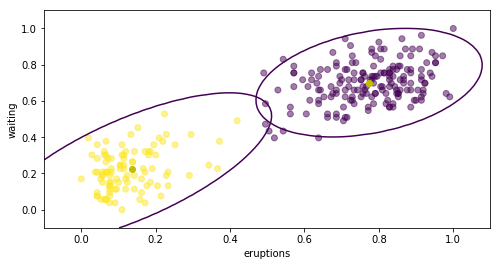

In [9]:
# Build bivariate distributions (if data are 2D)
A,B = np.meshgrid(np.linspace(-0.1,1.1,100),np.linspace(-0.1,1.1,50))
Z = range(K)
for k in range(K):
    Z[k] = mlab.bivariate_normal(A,B, np.sqrt(E_new[k][0,0]), np.sqrt(E_new[k][1,1]), 
                                 mu_new[k][0,0],mu_new[k][0,1],E_new[k][0,1] )

fig = figure(figsize=(8,4))
sub = fig.add_subplot(111)

color = np.argmax(gamma_new,axis=1)    

# Plot data (different colores = different clusters)
sub.scatter(X[:,0],X[:,1],c=color,alpha=0.5)
# Set labels
sub.set_xlabel('eruptions')
sub.set_ylabel('waiting')
# Plot contours for the bivariate distributions
# The line corresponds to the value at which the
# distribution is 2.5% of its maximum value
for k in range(K):
    sub.contour(A,B,Z[k],[0.025*np.max(Z[k])])
# Set scale
sub.set_xlim([-0.1,1.1])
sub.set_ylim([-0.1,1.1])
# Plot centroids
sub.scatter(mu_new[:,0],mu_new[:,1],color='y')

plt.show()

<h3> How many clusters? </h3>

In the case we studied, the data are very well separate in two clusters and so it is easy to choose the value of $K$ which has to be used. But what if the data are closer together or it is not clear how many clusters to identify? In this case the EM algorithm takes care of the problem by itself!

Suppose we want to choose $K=3$ and let's run again the algorithm.

In [10]:
# Initialize matrices for clustering EM algorithm
K = 3
mu,E,pi = _initialize(N,K)

# Copy initial values
mu_new = np.copy(mu)
E_new = np.copy(E)
pi_new = np.copy(pi)

# Start EM iterations
maxIter = 55
for i in range(maxIter):
    # E-step (evaluate posterior)
    gamma_new = _getGamma(X,mu_new,E_new,pi_new)
    # M-step (update parameters)
    mu_new,E_new,pi_new = _Mstep(X,gamma_new)
    # Here we check that all the elements of pi_new,
    # which is the array of the mixing coefficients,
    # are larger than the numerical precision
    if ((pi_new < 1E-15).any()):
        print pi_new
        break

[[  6.33017640e-01]
 [  3.66982360e-01]
 [  1.34312262e-17]]


From the above result we immediately see that the mixing coefficient for the third Gaussian goes to zero, meaning that the third Gaussian needs not to be in the mixture. Because $\gamma(z_k)$ is a vector in $\mathbb{R}^{K}$ and because the way it is defined in Eq.(10), we see that if one of the $\pi_k$ coefficients is zero, the corresponding element of the $\gamma(z_k)$ vector will also be zero. Since $\gamma(z_k)$ always appears in the denominator of the update rules for $\pi_k, \mu_k$ and $\Sigma_k$, we must stop the algorithm if one of the $\pi_k$ is zero in order to avoid division by zero.

Stopping the algorithm in this way will tell us if we are picking a number of clusters which is too high for the data we are trying to describe.